In [1]:
# Import the necessary Libraries

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from yellowbrick.regressor import PredictionError, ResidualsPlot


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



In [7]:
# Reading in the dataset
data=pd.read_csv("Advertising.csv")

Perform an Exploratory Data Analysis on the dataset

In [8]:
# Viewing the first 5 rows
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [12]:
# Viewing the last 5 rows
data.tail()

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [13]:
# Showing a statistical summary of the dataset
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [14]:
# viewing the data types in the dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [15]:
# checking whether there are null values
data.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

Visualization of the dataset to show the relationship between the feature values and the target value(Sales)

In [21]:
# Visualizing a scatter plot to show the relationship between the features and the label
px.scatter(data, x=['TV', 'radio','newspaper'], y="sales", size_max=60)

2020-09-18 21:17:01.645 INFO    numexpr.utils: NumExpr defaulting to 4 threads.


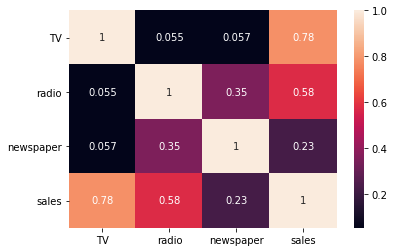

In [25]:
# Plotting a correlation Matrix
sns.heatmap(data.corr(), annot=True)

Feature selection and Creation Linear Regression Models

In [32]:
# Create the features and the target values
features=['TV', 'radio']
x=data[features ]
y=data.sales
# we ignore or drop the newspaper column since it has very low correlation with sales

In [34]:
# split the dataset into training and testing
x_train,x_test,y_train, y_test=train_test_split(x,y, test_size=0.3)

In [35]:
# Instantiate and  the model
reg=LinearRegression() 
reg.fit(x_train, y_train)

LinearRegression()

In [36]:
# Using the model to predict for the y_test
y_pred=reg.predict(x_test)

In [38]:
# Check the accuracy of the model using the regression metrics
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

Root Mean Squared Error: 1.649842576515215
Coefficient of Determination: 0.8656515894044463


In [41]:
# print the coefficient and the intercepts
list(zip(features , reg.coef_))


[('TV', 0.047176949843062754), ('radio', 0.18653064530352753)]

In [42]:
print("Intercept: ", reg.intercept_ )

Intercept:  2.7832610950355328


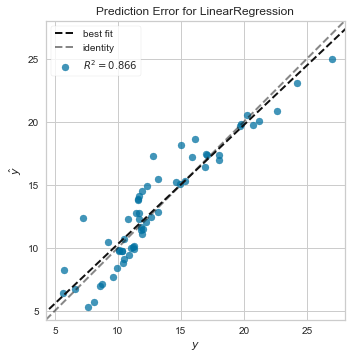

In [44]:
# Visualize the prediction error using yellowbrick
visualizer = PredictionError(reg)

visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.poof() 

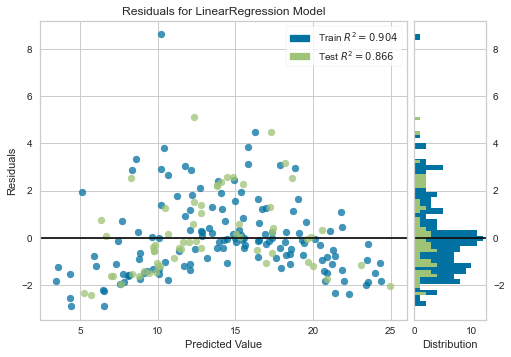

In [45]:
visualizer = ResidualsPlot(reg)
visualizer.fit(x_train, y_train)  
visualizer.score(x_test, y_test) 
visualizer.poof()

In [47]:
#since most of the error are unexplained , lets interact the feature variables 
data['interaction'] = data['TV'] * data['radio']

In [48]:
x= data[['TV', 'radio', 'interaction']]
y = data.sales

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2: ", r2_score(y_test, y_pred))

RMSE : 1.2504024468634813
R^2:  0.9424318698568253


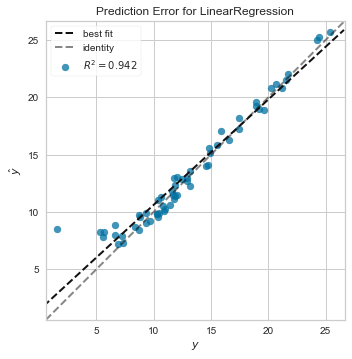

In [49]:
visualizer = PredictionError(reg)

visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.poof() 